In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('footfalls.csv')
data.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


In [18]:
data.shape

(159, 17)

In [19]:
data.dtypes

Month             object
Footfalls          int64
t                  int64
log_footfalls    float64
t_square           int64
Jan                int64
Feb                int64
Mar                int64
Apr                int64
May                int64
Jun                int64
Jul                int64
Aug                int64
Sep                int64
Oct                int64
Nov                int64
Dec                int64
dtype: object

In [20]:
data.isnull().sum()

Month            0
Footfalls        0
t                0
log_footfalls    0
t_square         0
Jan              0
Feb              0
Mar              0
Apr              0
May              0
Jun              0
Jul              0
Aug              0
Sep              0
Oct              0
Nov              0
Dec              0
dtype: int64

<AxesSubplot:>

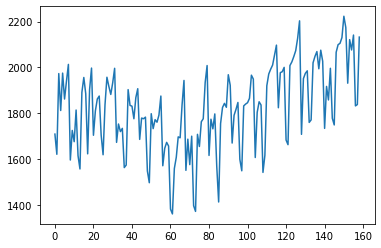

In [21]:
data['Footfalls'].plot()

<AxesSubplot:xlabel='Footfalls'>

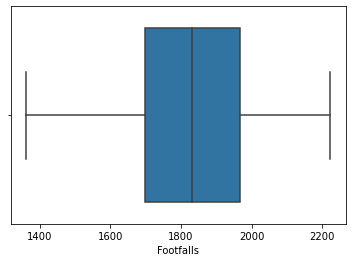

In [22]:
sns.boxplot(data['Footfalls'])

<AxesSubplot:ylabel='Density'>

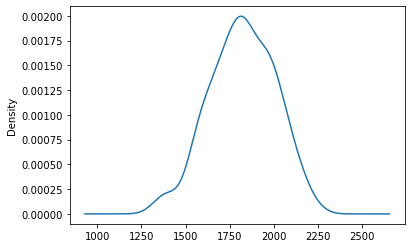

In [23]:
data['Footfalls'].plot(kind='kde')

In [5]:
data['Data']=pd.to_datetime(data['Month'],format="%b-%y")

#data["month"] = data.Date.dt.strftime("%b") # month extraction
#data["year"] = data.Date.dt.strftime("%Y")

In [6]:
data['month']=data['Data'].dt.strftime('%b')

In [7]:
data['year']=data['Data'].dt.strftime('%y')

In [8]:
data

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Data,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,Jan,91
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,Feb,91
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,Mar,91
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,Apr,91
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,Nov,03
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,Dec,03
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,Jan,04
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01,Feb,04


<AxesSubplot:xlabel='year', ylabel='Footfalls'>

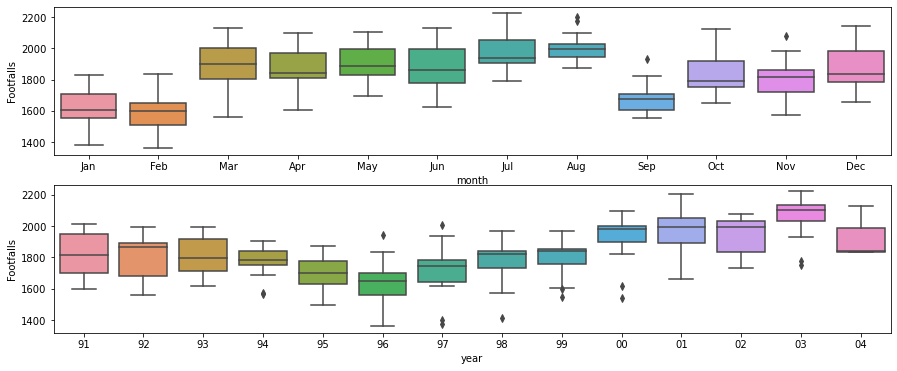

In [28]:
plt.figure(figsize=(15,6))
plt.subplot(211)
sns.boxplot(x="month",y="Footfalls",data=data)
plt.subplot(212)
sns.boxplot(x="year",y="Footfalls",data=data)

<AxesSubplot:xlabel='year', ylabel='Footfalls'>

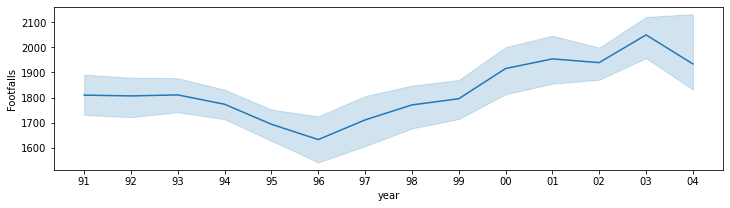

In [29]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Footfalls",data=data)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

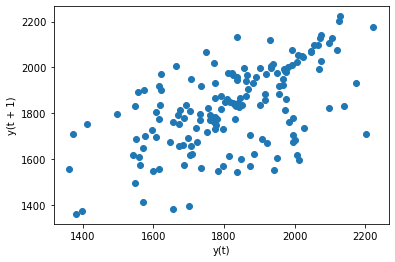

In [30]:
from pandas.plotting import lag_plot

lag_plot(data['Footfalls'])

### ACF abd PACF plot

ACF - plot between lags and values of correlation

PACF - partial auto-correlation function, plot between lags and residuals 

(Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals)

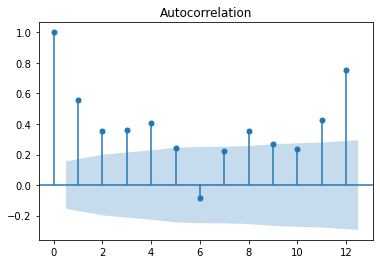

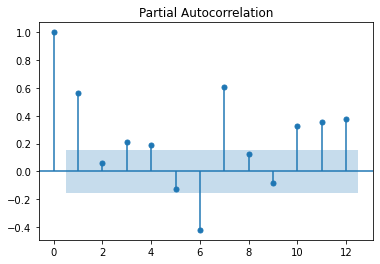

In [18]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Footfalls,lags=12)
tsa_plots.plot_pacf(data.Footfalls,lags=12)
plt.show()

### Time series decomposition plot

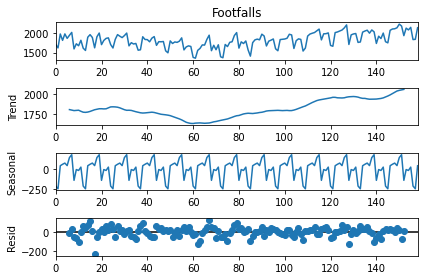

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data['Footfalls'],period=12)
decompose_ts_add.plot()
plt.show()

### Data splitting

In [9]:
train=data.head(147)
test=data.head(12)

### Model based forcasting

#### Linear model

In [11]:
import statsmodels.formula.api as smf 
from sklearn.metrics import mean_absolute_percentage_error

linear_model = smf.ols('Footfalls~t',data=train).fit()
linear_pred=linear_model.predict(test['t'])

linear_rms=mean_absolute_percentage_error(test['Footfalls'],linear_pred)*100
linear_rms

7.196752346060394

#### Exponential model

In [24]:
Exp = smf.ols('log_footfalls~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = mean_absolute_percentage_error(test['Footfalls'],pred_Exp)*100
rmse_Exp

99.58596348084873

#### Quadratic

In [26]:
Quad = smf.ols('Footfalls~t+t_square',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_square"]]))
rmse_Quad = mean_absolute_percentage_error(test['Footfalls'],pred_Quad)*100
rmse_Quad

6.850410061112509

#### Additive seasonality 

In [29]:
add_sea = smf.ols('Footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = mean_absolute_percentage_error(test['Footfalls'],pred_add_sea)*100
rmse_add_sea

3.388907762607274

#### Additive Seasonality Quadratic 

In [30]:
add_sea_Quad = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = mean_absolute_percentage_error(test['Footfalls'],pred_add_sea_quad)*100
rmse_add_sea_quad

3.331857176972474

#### Multiplicative Seasonality

In [32]:
Mul_sea = smf.ols('log_footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = mean_absolute_percentage_error(test['Footfalls'],pred_Mult_sea)*100
rmse_Mult_sea

99.58370404869235

#### Multiplicative Additive Seasonality 

In [33]:
Mul_Add_sea = smf.ols('log_footfalls~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = mean_absolute_percentage_error(test['Footfalls'],pred_Mult_add_sea)*100
rmse_Mult_add_sea 

99.58619493838664

### Data driven forcasting

#### Moving average

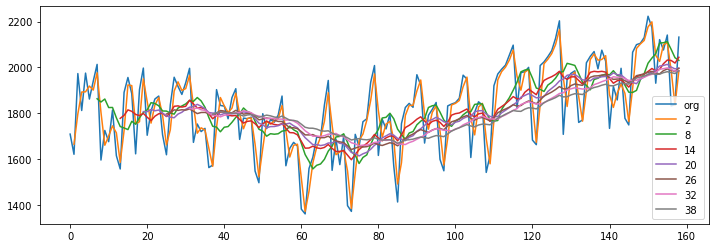

In [35]:
plt.figure(figsize=(12,4))
data['Footfalls'].plot(label="org")
for i in range(2,43,6):
    data['Footfalls'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

#### Simple Exponential Smoothing model

In [37]:
# forcast -  based on current time
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(train["Footfalls"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])

ses_rms=mean_absolute_percentage_error(pred_ses,test['Footfalls'])*100 
ses_rms

6.965650376940199

#### Holt model

In [39]:
# forcast - based on current time, trend
from statsmodels.tsa.holtwinters import Holt

hw_model = Holt(train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2) # two levels of smoothening
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
hw_rms=mean_absolute_percentage_error(pred_hw,test['Footfalls'])*100 
hw_rms

7.242157996966949

#### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [9]:
# forcast - based on current time, trend, seasonality
from statsmodels.tsa.holtwinters import ExponentialSmoothing  # three levels of smoothening

hwe_model_mul_add = ExponentialSmoothing(train["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])

hw_ma_rms=mean_absolute_percentage_error(pred_hwe_mul_add,test['Footfalls'])*100 
hw_ma_rms

1.9371186823765212

In [10]:
# forcast - based on current time, trend, seasonality
from statsmodels.tsa.holtwinters import ExponentialSmoothing  # three levels of smoothening

hwe_model_mul_add = ExponentialSmoothing(train["Footfalls"],seasonal="add",trend="mul",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])

hw_ma_rms=mean_absolute_percentage_error(pred_hwe_mul_add,test['Footfalls'])*100 
hw_ma_rms

2.322831915291497

#### Holts winter exponential smoothing with additive seasonality and additive trend

In [43]:
hwe_model_add_add = ExponentialSmoothing(train["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])

hw_aa_rms=mean_absolute_percentage_error(pred_hwe_add_add,test['Footfalls'])*100 
hw_aa_rms

2.4146933260156698

### ARMA Model

In [15]:
from statsmodels.tsa.arima_model import ARMA

ARMAmodel = ARMA(train['Footfalls'], order=(3, 0)) #model with AR=0 and MA=1
ARMAmodel_fit = ARMAmodel.fit()

ARMA_pred = ARMAmodel_fit.predict(0,11)
ARMA_pred

arma_rms=mean_absolute_percentage_error(ARMA_pred,test['Footfalls'])*100 
arma_rms

7.502504635416011

### ARIMA

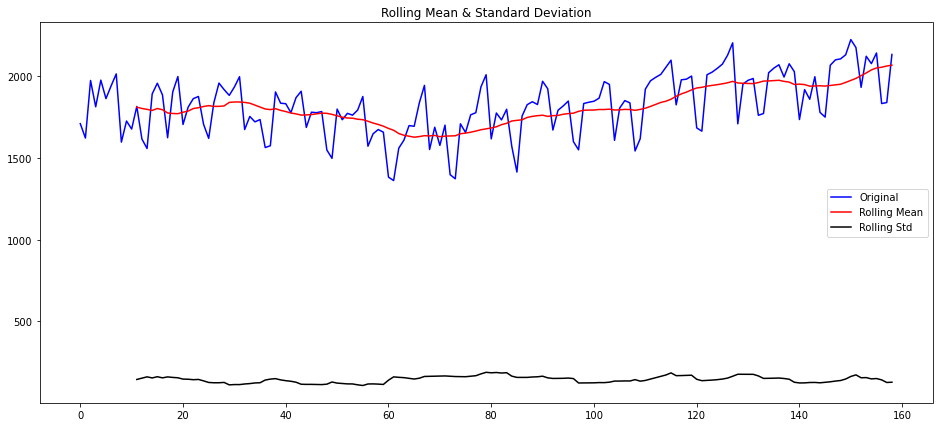

In [9]:
rolLmean = data['Footfalls'].rolling(12).mean() # 12 entries
rolLstd = data['Footfalls'].rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(data['Footfalls'], color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

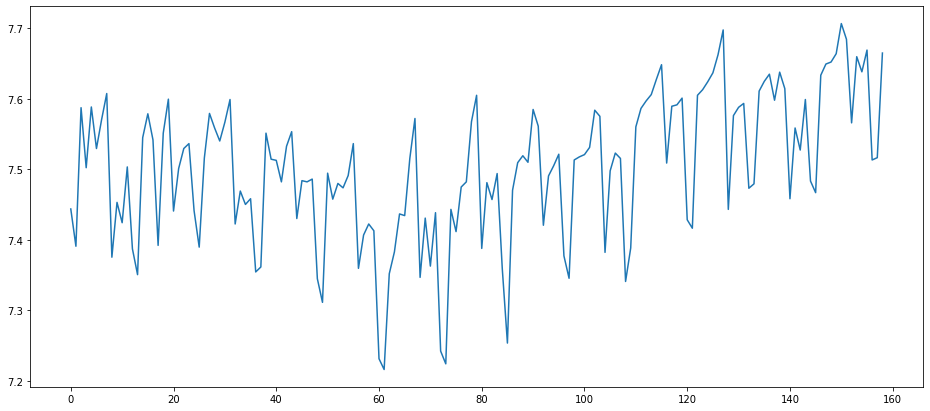

In [17]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(data['Footfalls'])#to transform to stationary from non-stationary
plt.plot(ts_log)

#### Differencing

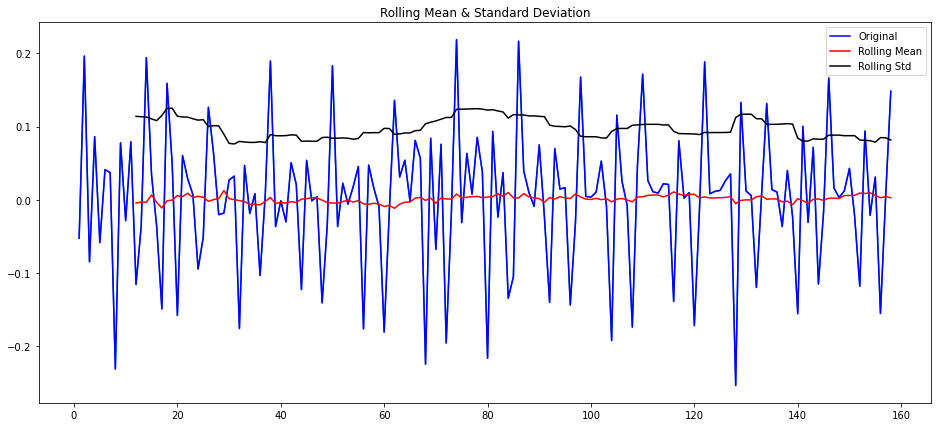

In [18]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift(periods=1) # I will shift the time series by 1 and subtract from the original TS.
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()

#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [19]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=12)
lag_pacf = pacf(ts_log_diff, nlags=12)

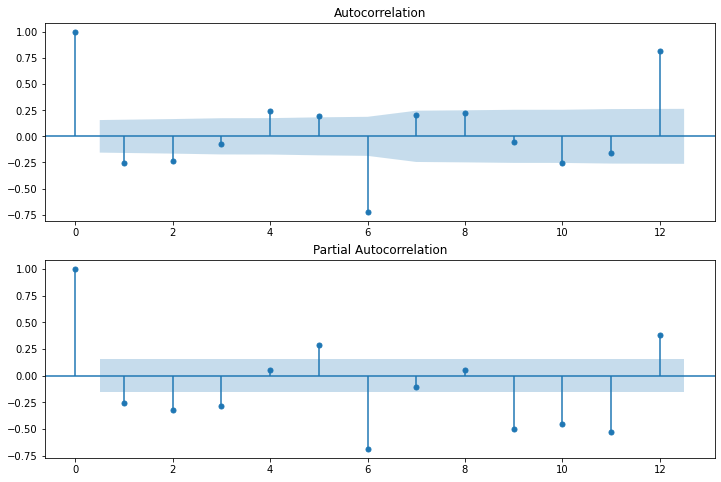

In [20]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=12,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=12,ax=ax2)

In [21]:
import itertools
p = range(0,5) #AR order
d = range(0,5) #Shift
q = range(0,5) #MA order
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [22]:
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    try:
        model_arima = ARIMA(train['Footfalls'],order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 1931.256183015908
(0, 0, 1) 1897.5390945949853
(0, 0, 2) 1889.9175078128123
(0, 0, 3) 1896.0608713219347
(0, 0, 4) 1873.3276096739398
(0, 1, 0) 1916.6958080791985
(0, 1, 1) 1887.028315116491
(0, 1, 2) 1872.7996620032188
(0, 1, 3) 1874.694349568841
(0, 1, 4) 1859.113389171559
(0, 2, 0) 2037.2005485498833
(0, 2, 1) 1911.5543346417448
(0, 2, 2) 1885.1404971475133
(0, 2, 3) 1871.4116988752264
(0, 2, 4) 1874.7009964543304
(1, 0, 0) 1890.539301528449
(1, 0, 1) 1892.1352138307518
(1, 0, 2) 1885.5097796041005
(1, 0, 3) 1887.0878455732304
(1, 0, 4) 1866.4577296137968
(1, 1, 0) 1908.2073751527378
(1, 1, 1) 1874.224261408597
(1, 1, 2) 1875.3967569620788
(1, 1, 3) 1869.9877823157524
(1, 1, 4) 1857.5228140867846
(1, 2, 0) 1995.6571927268253
(1, 2, 1) 1903.6142344825807
(1, 2, 2) 1915.4356722195228
(1, 2, 3) 1872.8429139739635
(1, 2, 4) 1873.105926021018
(2, 0, 0) 1892.4444755352747
(2, 0, 1) 1892.5852881543708
(2, 0, 2) 1887.8639128692832
(2, 0, 4) 1855.5350427802498
(2, 1, 0) 1893.765125

In [35]:
### from statsmodels.tsa.arima_model import ARIMA

ARIMAmodel = ARIMA(train['Footfalls'], order=(4, 0, 4)) #notice p,d and q value here
ARIMA_model_fit = ARIMAmodel.fit()

ARIMA_pred = ARIMA_model_fit.predict(1,12,typ='levels')

arima_rms=mean_absolute_percentage_error(ARIMA_pred,test['Footfalls'])*100
arima_rms

5.259210375623653